# The Weather and the Blues: Analyzing The Impact of Weather on Yelp Reviews 
## By Ryan Apfel 

## Abstract

The digital evolution has had profound changes on the study of Depression and mood related disorders. With computers infiltrating every aspect of our lives, non-intrusive methods of psychological research have started to evolve. While many researchers focus on Social Media as means to analyze human behavior, large open source datasets from consumer products like the Yelp Review Dataset provide rich, clean sources of data to explore and analyze human behavior. My goal was to use natural language processing (NLP) on the Yelp review dataset to explore variations in sentiment, mood, and rating with respect to various weather-related data. Along these lines, I wanted to explore the physiological implications of weather: does weather cause depression? Does weather impact business? I used an open source Python text-analysis library to perform basic sentiment analysis and assist in parts-of-speech tagging. I then created a simple “term frequency, inverse document frequency” (TF-IDF) script to analyze pronoun usage using the methods popularized by Pennebaker (2011). Combining the weather data with each review, I found no evidence that weather has an impact on sentiment or mood. There was however an expected relationship between usage of “I words” (indicating depression or worse mood) and lower review scores (i.e a higher star rating). From a personal growth prospective, working on this project provided me with a wealth of useful information on project management, data collection, data visualization, API’s, and much more. 


## Seasonal Affective Disorder (SAD)

Seasonal affective disorder is a mood disorder that exhibits similar characteristics of depression by virtue of the change in seasons. According to Cedars Sinai, SAD is caused by a chemical change in the brain that is associated with less daylight and shorter days (“Seasonal Affective Disorder”, n.d). Colloquially, most people associate SAD with Winter, where the days are shorter, and the temperature is cooler. However, the onset of SAD is subjective to an individual’s respective background. People already diagnosed with mood disorders are often diagnosed with SAD when their symptoms worsen in the winter or summer. They are uniquely classified as Fall-onset or Spring-onset, and they are diagnosed through a professional evaluation.  

SAD shares many traits similar to clinical depression, and as a result, it is under researched and the causes of SAD are not entirely understood. That being said, there are some interesting avenues for exploration.  A 2007 study found that SAD is more prevalent and severe amongst college aged students (Sullivan & Payne, 2007).  A 2001 study found levels of melatonin in patients diagnosed with SAD were higher than a control group (Wehr & Duncan, 2001). These findings went against the findings of a study performed by Checkley and Murphy in 1993 that found no link between melatonin levels and SAD (Checkley & Murphy, 1993). Possibly contributing to the maligned “winter only” definition of SAD is that geographic location also plays a role in SAD. Prevalence of winter SAD is much higher in northern latitudes then it is in southern latitudes (Rosen, 1990). In the United States, a 2017 study found that daylight savings time contributed to a 11% increase in SAD episodes (Hansen, 2017). 

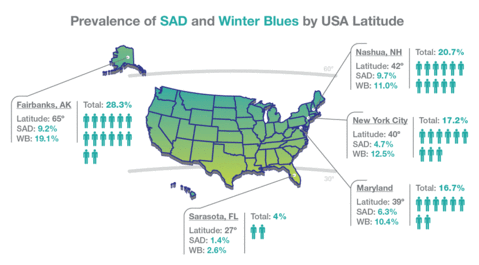

## Personal Anecdotes on Seasonal Affective Disorder

I’ve been lucky enough to grow up in Los Angeles most of my life. Unlike many other places in the world, when I woke up for school as a child, I never had to think twice about wearing a t-shirt and flips flops to school.  This changed for me when I decided to play basketball at a liberal arts college in Massachusetts. Moving across the country was what initially opened my eyes to the impact weather could have on my mood. I distinctly remember early on my Freshman year in Massachusetts, after five straight days of lighting and thunder, I felt significantly less happy. Even in LA, there are weeks where it rains a lot and while it may seem like the world is ending, I had never experienced mood changes because of it. But in Massachusetts, these changes in weather had a profound effect on me. As the semester progressed and the days became shorter, I realized my mood was almost constantly tied to the weather. Surprisingly, overcast days were more impactful on me then cold days. It wasn’t until a conversation with another student from California that I learned of seasonal affective disorder. After some research, I realized I  had been experiencing many of the SAD symptoms.  

After one year in Massachusetts, the warm mild climate of Los Angeles was calling my name again, so I decided to transfer to USC. As expected, the familiar climate immediately solved any resemblance of SAD, but my time in Massachusetts left with a defining experience of the affects weather can have on a “thin skinned” Angeleno like myself. After settling in at USC, I didn’t think much of my experience with weather in Massachusetts. Until, that is, my sister announced she’d be moving to a considerably more sever climate than Massachusetts. 

My sister also grew up in Los Angeles, but unlike me, she attended USC straight out of high school, making her first 22 years of life all in Los Angeles.  Once she was accepted to a medical school in Milwaukee, Wisconsin, my family and I all worried that she would also experience SAD once she moved there. Surprisingly, her first year in Wisconsin went well; she studied so much that she was barely ever outside.. But in her second year, the winter weather worsened considerably, and she too felt the consequences of her disposition as a life-long Angeleno. I empathized with her situation, as she began to describe many of the same mood swings that I experienced from the weather.

Around the same time my sister was sharing her experiences with SAD was when I began to explore options for a final project in PSYCH499. My experience combined with my sister’s led me to start asking questions that are essential to any research project. I wondered if I was predisposed to getting SAD because of where I grew up. I also wondered how long it takes someone to acclimate to a new climate. Given the difficulty of answering these questions, there wasn’t much research on SAD in the specific context of migration. Most research surrounding SAD focus on the biochemical reactions that cause and alleviate SAD, not the very specific subpopulation of people who are moving to new places. Given the unique possibilities that digital technologies provide psychological research, I decided I would attempt to answer these questions.


## Methods

What are the physiological and behavioral impacts of weather on different demographics of people? This was my initial research question when I first started this project. Initially, I brainstormed a few ways to answer this question. Option one was to use geographically filtered Tweets that responded to various weather patterns. For example, there’s a heat wave in San Francisco; I collect tweets from before, during, and after that the heat weave to see how sentiment and the contents of tweets changed. I ditched the Twitter method due to the restrictions of the API and the lack of time I had to complete the project. My second option was scraping travel blogger post entries. This method would successfully capture the effect that moving from one place to another would have on mood and sentiment, so it seemed like a good option. However, after further exploration it became apparent that most travel bloggers tag their posts by country. As a result, the weather data associated with each post would’ve been an average of the entire country’s weather— making the weather data too broad and effectively useless. The final option I laid out was to use a Kaggle data set containing reviews from a large time period. This option gave me a clean, large dataset, that allowed me to explore multiple relationships between weather and the contents of the reviews. 

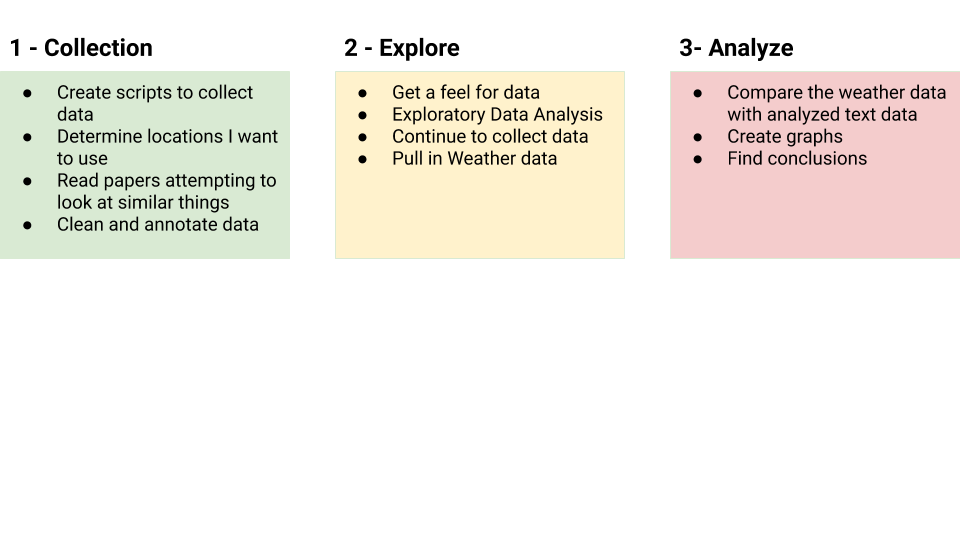

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import math
import re
import os


sns.set()
current_palette = sns.color_palette()
sns.palplot(sns.color_palette("Blues"))

%matplotlib inline

### Yelp Dataset 

Yelp is a massively popular crowd-sourced review forum that was founded in 2004 (Yelp, 2019). The founders of Yelp hoped to hedge the internet to fuel the democratization of public recommendations for businesses of all types. They’ve grown tremendously since 2004 and have overthrown the previous standard of using Yellow Pages for business information. Given that they are a digital platform, they possess an incredible amount of valuable data. With this trove of data, they created the Yelp Dataset Challenge: a competition for students to find meaningful insight from their open sourced dataset. The dataset and competition is updated every year, and currently the competition is in it’s thirteenth iteration (Yelp Dataset, 2019). 

The dataset consists of over 6.7 million reviews spanning over 10 metropolitan areas. One of the many issues with physiological research is the necessity of performing lab experiments with a limited sample sizes. With over 1 million unique users, the dataset is large, nonreactive, complete, and clean. One issue with the dataset is its representativeness. Some assumptions I’ve made on the dataset is that it represents a tech-savvy population of users and might not represent older populations. Usage drift and system drift are other issues with large datasets like the Yelp dataset. Salganik defines behavioral drift as the change in how people use a data collection system, and system drift as the change in the data collection system itself (Salganik, 2018). Given the growth and changes of the platform over time, the Yelp datasets longitudinal research is unclear. 

The dataset consists of six unique files for businesses, users, reviews, check-ins, tips, and photos. For this project I used the businesses, the users, and the reviews files. In order the load the dataset without crashing my computer, I sampled 500,000 reviews from the 6.7 million reviews. Using Pandas, I merged the two datasets so that each review contained a geographic location. Finally, I performed exploratory data analysis to develop an understanding of the data I was working with. 


In [ ]:
weather = pd.read_csv('data/vegas_weather_data.csv')

In [197]:
# clean weather
weather = weather.dropna(how='any') #drop NA's

def tToNum(x):
    if x == 'T':
        return 0.01
    else:
        return x
    
weather['prcp'] = weather.prcp.apply(tToNum)
weather = weather.drop(columns=['Unnamed: 0'])
weather['date'] = pd.to_datetime(weather.date).dt.strftime('%d-%m-%Y')
weather['avg'] = weather.apply(lambda x: (x.high + x.low) / 2, axis=1)


In [5]:
#import business and review
review = pd.read_csv('data/review.csv', nrows=500000)
business = pd.read_csv('data/business2.csv')

In [198]:
# clean business and reviews
reviews = pd.merge(review,business,left_on=review.business_id, right_on=business.business_id)
reviews = reviews[['date','stars_x','text','name','city','state','postal_code','user_id']]
reviews.rename(columns={'stars_x':'stars'})
reviews['postal_code'] = pd.to_numeric(reviews['postal_code'], errors='coerce', downcast='signed')
reviews = reviews.dropna()
reviews['postal_code'] = reviews['postal_code'].astype('int64')
reviews = reviews.rename(columns={'stars_x':'stars'})
reviews['date'] = pd.to_datetime(reviews.date).dt.strftime('%d-%m-%Y')


In [199]:
def clean_string(text):
    text = text.lower()
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    text = regex.sub('', text)
    text = re.sub('\d+', '', text)
    return text

reviews['text'] = reviews['text'].apply(clean_string)

In [8]:
# only vegas data
reviews = reviews[reviews.city == 'Las Vegas']

In [9]:
vegas = pd.merge(reviews, weather, left_on=reviews.date, right_on=weather.date)
vegas = vegas.drop(columns=['date_y','key_0','postal_code','city','state'])
vegas = vegas.rename(columns={'date_x':'date'})
vegas['date'] = pd.to_datetime(vegas.date)
vegas['month'] = vegas.date.dt.month #get the month
vegas['year'] = vegas.date.dt.year #get the year
vegas['weekday'] = vegas['date'].dt.dayofweek #get weekday num
vegas['prcp'] =  pd.to_numeric(vegas['prcp'], errors='coerce')
vegas.head()

,date,stars,text,name,user_id,high,low,prcp,snow,snow_depth,avg,month,year,weekday
0,2013-07-05,1.0,total bill for this horrible service over gs t...,MountainView Hospital,hG7b0MtEbXx5QzbzE6C_VA,72.0,57.9,0.0,0.00,0.0,64.95,7,2013,4
1,2013-07-05,4.0,my boyfriend and i went here as part of a preb...,Border Grill,LtP1qQPR_5T-bQc_IQ42yA,72.0,57.9,0.0,0.00,0.0,64.95,7,2013,4
2,2013-07-05,3.0,i think i lean more towards stars \r\n\r\ni l...,Honey Salt,sa5zd7bwBQzajQB48Y9SUw,72.0,57.9,0.0,0.00,0.0,64.95,7,2013,4
3,2013-07-05,5.0,my friend and i visited this out of the way ma...,Island Malaysian Cuisine,B3tQ-TJ6Ca_AxKn15VAEEA,72.0,57.9,0.0,0.00,0.0,64.95,7,2013,4
4,2013-07-05,2.0,there is absolutely no point in coming here if...,Encore Beach Club,NeXRy1C7PxS7bvIcQ3SymA,72.0,57.9,0.0,0.00,0.0,64.95,7,2013,4


Text(0.5, 1.0, 'Total Reviews in Las Vegas by Month')

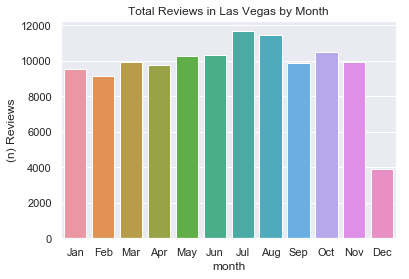

In [10]:
month = vegas.groupby('month').date.count()
ax = sns.barplot(month.index, month)
months = [date(2008,i,1).strftime('%b') for i in range(1,13)]
ax.set_xticklabels(months)
plt.ylabel('(n) Reviews')
plt.title("Total Reviews in Las Vegas by Month")


Text(0.5, 1.0, 'Total Reviews in Las Vegas by Star')

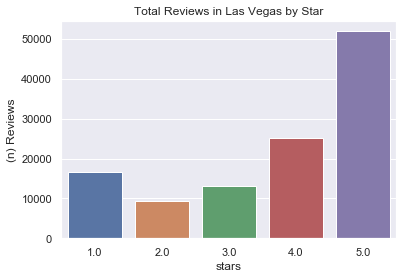

In [11]:
stars = vegas.groupby(vegas.stars).date.count()
ax = sns.barplot(stars.index, stars)
ax.set_ylabel('(n) Reviews')
ax.set_title("Total Reviews in Las Vegas by Star")

Text(0.5, 0, 'Review Length')

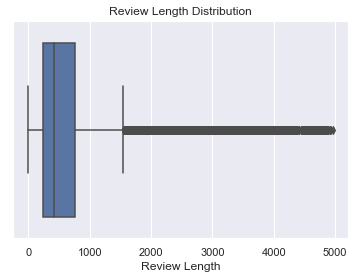

In [15]:
ax = sns.boxplot(vegas.text.apply(lambda k: len(k)))
ax.set_title("Review Length Distribution")
ax.set_xlabel("Review Length")

### Weather Data Collection

#### Attempt One: 
Since 1970, the National Oceanic and Atmospheric Administration (NOAA) has sought to accurate weather information to the general public. NOAA uses a national gird of certified weather stations to collect and send weather data to a national database (About NCDC, n.d.). Every single news channel or weather application in the United States creates their predictions from the open source data that NOAA provides. The National Center for Environmental Information (NCDC), a subsidiary of NOAA, uses an API to distribute satellite, radar, and temperature data to the entities that need it. Given my needs for this project I sought to use this API to provide comprehensive historical weather data for all 500,000 reviews that I was using. 

While planning this project, I assumed that collecting the weather data would be one of the easier tasks. I was wrong. The first problem I encountered was the NCDC API daily request limit of 10,000. With the assumption that each request returns data for one review, I would’ve needed 50 days to collect weather data for all 500,000 reviews that I was using. To work around this, I found the oldest and newest review for every zip code in the dataset. This effectively established a range of dates for every zip code that I needed weather data for. By doing requesting data only within this range, I was able to reduce the time I needed to collect the weather data from 50 days to a couple hours. 

After I finished running the collection script, I ran into my second problem: messy, incomplete data. For starters, some zip codes had no historical data, making them completely useless. For the zip codes that returned historical data, the data returned was incomplete. Some zip codes only returned mean temperature. Some zip codes only returned snow and rain counts. What I had was almost completely useless. 

#### Atempt Two:

After some brainstorming with my TA, I changed my approach. In EDA, I found that nearly a quarter of the dataset consisted of reviews from Las Vegas. By limiting the dataset to one zip code, I narrowed the focus of finding the historical data considerably. I Googled “Las Vegas Historical Weather” and found a few free non-government website containing clean daily historical data. I chose usclimatedata.com and proceeded to build a script that scraped the entire website in a few minutes. This time, the data was perfect as it included average, high, and low temperature and rain and precipitation for every review in Las Vegas.

Text(0.5, 1.0, 'Distribution of Temperatures in Las Vegas')

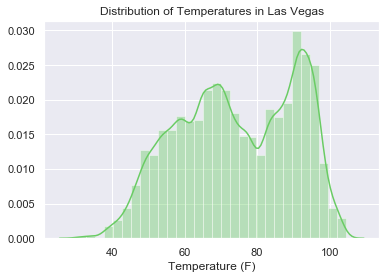

In [200]:
ax = sns.distplot(vegas.avg,bins=30,color='g')
ax.set(xlabel="Temperature (F)")
ax.set_title("Distribution of Temperatures in Las Vegas")

### Natural Language Processing

#### Sentiment Analysis

Since my goal was to understand if the reviewers exhibit depressive traits in response to climatic changes, I considered building a domain specific sentiment analysis model. Ideally, the model would classify the review from 0 to 1 if it exhibited traits of depression. The difficulty with building this model however was that there was no way to reliably train it. Instead, I used TextBlob, a Python text processing library. Built in to the library was a sentiment analysis tool that I used to classify the sentiment of every review. 

#### Pennebaker Pronoun Usage
Early work in social sciences using natural language processing was done by word count. By comparing the relative word frequencies of a list of words from two documents, we can unlock information about the author. Pennebaker has shown that people who are exhibiting depression like symptoms use pronouns differently (Pennebaker, 2011). More specifically, the usage of “I words” tends to increase while “we words” decrease simultaneously in depressed individuals.  
For every review, I counted the number of “I words”, “we words”, “they words”, and “big words.” I classified a big word as any word longer than 9 characters. After, I found the TF-IDF rating of each of these categories of words for each review. The TF-IDF provides the relative frequency of these words compared to the usage in all the reviews. 


In [17]:
i_words = ['i','me','my','myself','mine']
us_words = ['us','we','our','ours','were']
they_words = ['you','them','they','their','he','she','her','him','these']

In [18]:
def tf_group(group, blob):
    return sum([blob.words.count(i) for i in group]) / len(blob.words)
def n_containing_group(group, bloblist):
    num = 0
    for blob in bloblist:
        for i in group:
            if i in blob.words:
                num += 1
    return num

def idf_group(group, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(group, bloblist)))

def tfidf_group(group, blob, bloblist):
    return tf_group(group, blob) * idf_group(group, bloblist)

def big_tf(blob, bigSize):
    return sum(1 for word in blob.words if len(word) > bigSize) / len(blob)

def t_count(group, blob):
    return sum([blob.words.count(i) for i in group])

def big_count(blob, bigSize):
    return sum(1 for word in blob.words if len(word) > bigSize)

def row_tfidf(row):
    length = row['length']
    if length <= 0:
        length = 1
    row['i_tfidf'] = row['i_freq'] * (math.log(length) / (1 + row['i_num']))
    row['us_tfidf'] = row['us_freq'] * (math.log(length) / (1 + row['us_num']))
    row['they_tfidf'] = row['they_freq'] * (math.log(length) / (1 + row['they_num']))
    row['big_tfidf'] = row['big_freq'] * (math.log(length) / (1 + row['big_num']))
    return row

In [19]:
def nlp(row):
    blob = TextBlob(clean_string(row['text']))
    row['length'] = length = len(blob.words)
    if length <= 0:
        length = 1
    
    # get textblob sentiment rating
    row['sentiment'] = round(blob.sentiment.polarity, 2)
    
    #get frequencies for all i,us,they words, big words
    row['i_freq'] = t_count(i_words, blob) / length
    row['us_freq'] = t_count(us_words, blob) / length
    row['they_freq'] = t_count(they_words, blob) / length
    row['big_freq'] = big_count(blob, 9) / length
    
    return row

In [20]:
vegas = vegas.apply(nlp, axis=1)
vegas['i_num'] = (vegas['i_freq'] > 0).sum()
vegas['us_num'] = (vegas['us_freq'] > 0).sum()
vegas['they_num'] = (vegas['they_freq'] > 0).sum()
vegas['big_num'] = (vegas['big_freq'] > 0).sum()
vegas = vegas.apply(row_tfidf, axis=1)
vegas.head()

,date,stars,text,name,user_id,high,low,prcp,snow,snow_depth,...,they_freq,big_freq,i_num,us_num,they_num,big_num,i_tfidf,us_tfidf,they_tfidf,big_tfidf
0,2013-07-05,1.0,total bill for this horrible service over gs t...,MountainView Hospital,hG7b0MtEbXx5QzbzE6C_VA,72.0,57.9,0.0,0.00,0.0,...,0.027778,0.000000,93249,61689,86354,95630,1.067477e-06,0.000002,0.000001,0.000000
1,2013-07-05,4.0,my boyfriend and i went here as part of a preb...,Border Grill,LtP1qQPR_5T-bQc_IQ42yA,72.0,57.9,0.0,0.00,0.0,...,0.027273,0.081818,93249,61689,86354,95630,1.832993e-06,0.000006,0.000001,0.000004
2,2013-07-05,3.0,i think i lean more towards stars \r\n\r\ni l...,Honey Salt,sa5zd7bwBQzajQB48Y9SUw,72.0,57.9,0.0,0.00,0.0,...,0.018727,0.029963,93249,61689,86354,95630,4.039340e-06,0.000002,0.000001,0.000002
3,2013-07-05,5.0,my friend and i visited this out of the way ma...,Island Malaysian Cuisine,B3tQ-TJ6Ca_AxKn15VAEEA,72.0,57.9,0.0,0.00,0.0,...,0.000000,0.041958,93249,61689,86354,95630,1.116521e-06,0.000003,0.000000,0.000002
4,2013-07-05,2.0,there is absolutely no point in coming here if...,Encore Beach Club,NeXRy1C7PxS7bvIcQ3SymA,72.0,57.9,0.0,0.00,0.0,...,0.060150,0.030075,93249,61689,86354,95630,3.943114e-07,0.000000,0.000003,0.000002


## Results and Findings

### Study 1:

Study one attempted to show the variations of the different pronoun group usage with respect to stars.  I did not attempt to use weather in this study to see if variations in the data exist exclusive of weather. By calculating the mean TF-IDF for each group and rating, I was able to produce bar charts that showed some expected results. “I word” and “they word” usage increased when users gave a bad reviews. Intuitively this makes sense. A person that is unsatisfied with their experience is more likely to speak on the specific occurrences of their experience, using more pronouns to describe the interactions between themselves and the business. Satisfied users on the other hand used fewer “I and we words” and instead used big words at a higher frequency. This also makes sense as satisfied users might be more inclined to talk about their feelings they had with respect to their experience. 

What didn’t show here was an inverse relationship between “I word” and “we word” frequency. Had the usage of “us words” increased with rating, their might’ve been evidence that reviewers that give one star reviews exhibit  traits of depressed writers.


Text(0.5, 1.0, 'Big words by rating')

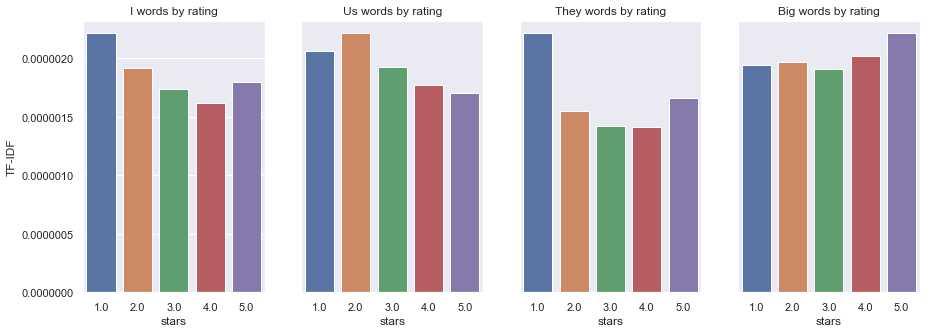

In [30]:
ratings = vegas.groupby('stars').mean()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
sns.barplot(ratings.index, ratings.i_tfidf, ax=axes[0])
axes[0].set_title("I words by rating")
axes[0].set_ylabel("TF-IDF")

sns.barplot(ratings.index, ratings.us_tfidf, ax=axes[1])
axes[1].get_yaxis().set_visible(False)
axes[1].set_title("Us words by rating")

sns.barplot(ratings.index, ratings.they_tfidf, ax=axes[2])
axes[2].set_title("They words by rating")
axes[2].get_yaxis().set_visible(False)

sns.barplot(ratings.index, ratings.big_tfidf, ax=axes[3])
axes[3].get_yaxis().set_visible(False)
axes[3].set_title("Big words by rating")


### Study 2:

For Study 2, I compared the sentiment rating from each review with the mean temperature from that day. As shown, there is no significant relationship between the two variables. 

My expectation was that there would’ve been a negative correlation between sentiment and mean temperature. This lack of correlation is not necessarily an indication that weather doesn’t affect someone’s mood. Instead, it shows that a review contains a far too narrow context to identify the implications of an external variable like weather.  A review is a short and narrow account of an experience a user has had with a business. The likelihood of an extraneous factor like weather impacting reviews over the totality of a dataset is very unlikely. 


Text(0.5, 6.799999999999979, 'Mean Temperature (F)')

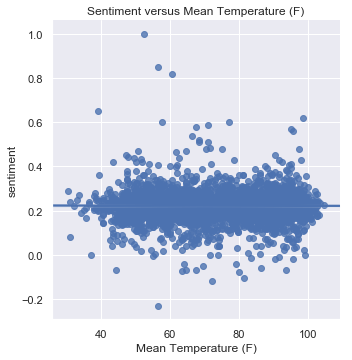

In [49]:
data = vegas.groupby('date').mean()
sns.lmplot(x='avg', y='sentiment', data=data)
ax = plt.gca()
ax.set_title("Sentiment versus Mean Temperature (F)")
ax.set_xlabel('Mean Temperature (F)')

In [26]:
counts = vegas.groupby('user_id').date.count().to_frame()
reviewers = pd.merge(vegas, counts, left_on=vegas.user_id, right_index=True)
reviewers = reviewers.rename(columns={'date_y':'reviewer_count','date_x':'date'})
reviewers = reviewers.drop(columns=['key_0'])

### Study 3:

Study three attempts to capitalize on the shortcomings of study two by narrowing the focus to a subset of users. Here, I selected the four users with the most number of reviews, and ran a regression on each users usage of “I words” and “us words.”  Again, the data is messy and doesn’t appear to show much of a meaningful relationship between temperature and depressive pronoun usage. However, “Us words” appear to be less frequently used as temperature increases. While this might be significant, the error padding on all the regression lines are very wide, indicating the variability of the data.


Text(0.5, 20.80000000000001, 'Mean Temperature (F)')

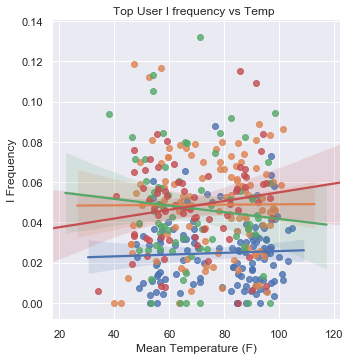

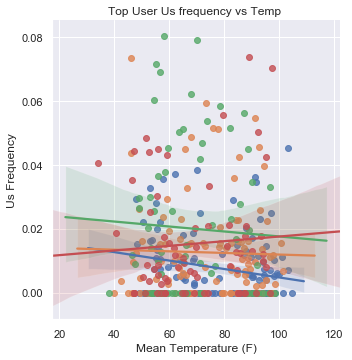

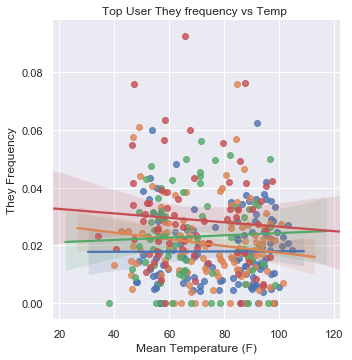

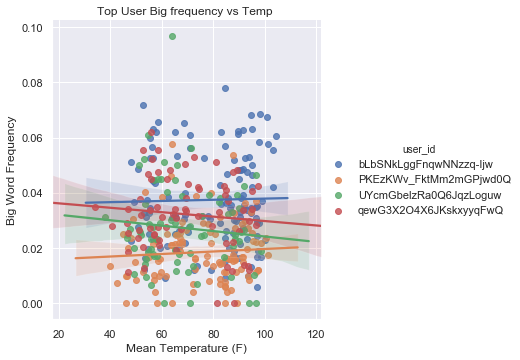

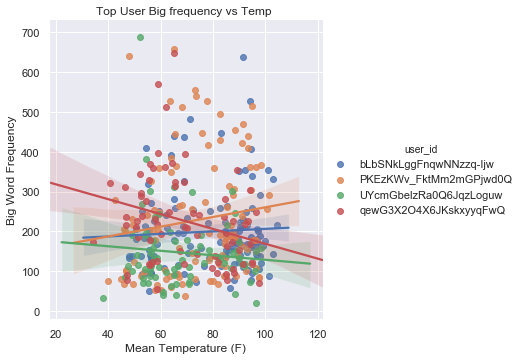

In [71]:

sns.lmplot(x="avg", y="i_freq", hue="user_id", data=reviewers_norm, legend=False)
ax = plt.gca()
ax.set_title("Top User I frequency vs Temp ")
ax.set_ylabel("I Frequency")
ax.set_xlabel("Mean Temperature (F)")

sns.lmplot(x="avg", y="us_freq", hue="user_id", data=reviewers_norm, legend=False)
ax = plt.gca()
ax.set_title("Top User Us frequency vs Temp ")
ax.set_ylabel("Us Frequency")
ax.set_xlabel("Mean Temperature (F)")


sns.lmplot(x="avg", y="they_freq", hue="user_id", data=reviewers_norm, legend=False)
ax = plt.gca()
ax.set_title("Top User They frequency vs Temp ")
ax.set_ylabel("They Frequency")
ax.set_xlabel("Mean Temperature (F)")

sns.lmplot(x="avg", y="big_freq", hue="user_id", data=reviewers_norm)
ax = plt.gca()
ax.set_title("Top User Big frequency vs Temp ")
ax.set_ylabel("Big Word Frequency")
ax.set_xlabel("Mean Temperature (F)")




### Study 4: 

During my time in Massachusetts, extreme weather had significant impacts on my mood. I decided to analyze some of our findings when the weather was particularly cold or particularly cold. Since weather histogram is not normal, I decided to set arbitrary upper and lower temperature limits to create the subgroups. For the hot days, I filtered out all the days where the high surpassed 112 degrees Fahrenheit. For the cold days, anything below 35 degrees Fahrenheit would be considered cold. I then compared the two to the rest of the population to produce some interesting results. “I words” were used more frequently when the weather was very hot. Contrastingly, on days where it was cold, I word usage was considerably lower. The results for “us words” followed a similar pattern, but the error was considerably higher. 

In [148]:
winter = vegas[vegas.date.dt.month == 12]
summer = vegas[vegas.date.dt.month == 6]
hot = vegas[vegas.high > 112]
cold =  vegas[vegas.low < 35]
compare = vegas[(vegas.high < 112) & (vegas.low > 35)]

hot['Key'] = 'Hot Days'
cold['Key'] = 'Cold Days'
compare['Key'] = 'Normal Days'

winter['Key'] = 'Winter'
summer['Key'] = 'Summer'


C:\Users\rasap\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\rasap\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rasap\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

Text(0.5, 1.0, 'Us words in Extreme Weather')

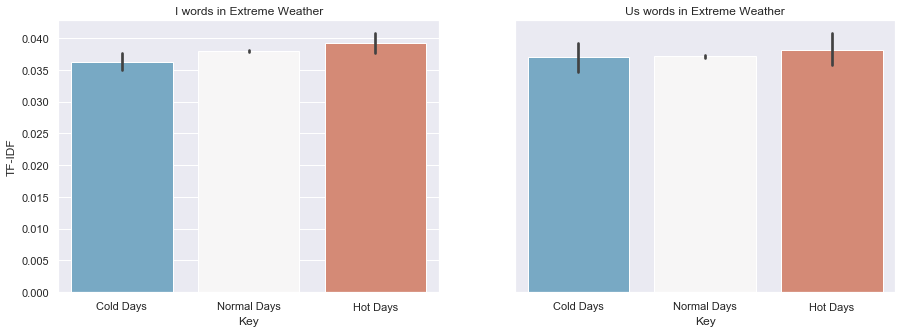

In [192]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.barplot(x=DF2.Key, y=DF2.i_freq,palette="RdBu_r", order=['Cold Days','Normal Days','Hot Days'], ax=axes[0])
axes[0].set_title("I words in Extreme Weather")
axes[0].set_ylabel("TF-IDF")

sns.barplot(x=DF2.Key, y=DF2.us_freq,palette="RdBu_r", order=['Cold Days','Normal Days','Hot Days'], ax=axes[1])
axes[1].get_yaxis().set_visible(False)
axes[1].set_title("Us words in Extreme Weather")






Text(0.5, 1.0, 'Rating during Extreme Weather')

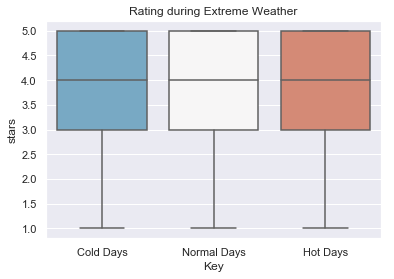

In [194]:
x = sns.boxplot(x=DF2.Key, y=DF2.stars,palette="RdBu_r", order=['Cold Days','Normal Days','Hot Days'])
x.set_title('Rating during Extreme Weather')

## Takeaways

Natural language proccesing has already had a massive impact on many different industries and fields of study. However, in order to see this impact, some basic requirements are neccsary. This project in particular has proven to me that a combination of high quality data and good research design practices are essential for a data science project of this size.

My intial research question was to find the physiological and behavioral impacts of weather on different demographics of people. While there were some interesting patterns, the findings from this project show no evidence that weather influences our physiological status and our behavior. Substantial research into seasonal affective disorder has shown that many different climatic variables impact our phycological state. However, as shown by this project using natural language processing on business reviews is unlikely to provide any meaningful results. 

### Limitations

Although my project did not provide many findings, I want to at least point out some of the limatations of the proccess I used. 

#### Dataset

The Yelp dataset has already proven to be a fantastic resoruce for research and natural language proccessing. However, attempting to use review data to detect psyccoolcigical impacts of weather is a very difficult task. While context is very important in any sort of natural languge proccessing task, prupose is also very important. The purpose of a Yelp review is to describe the experience you had in the minutes or hours that you were at a business. It’s a very narrow and direct task, and very different from a Tweet where there are no bounds on what is appropratie to write about. For this reason, I think the Yelp dataset shouldn’t be used for projects similar to this one. Instead, using Tweets or blog posts might provide more represenative data. 
#### Weather Data

Another limatiation of this study was the limited weather data. While I was able to gain access to temperatutre and rain data, SAD has been shown to be caused by light. Humidity and cloud cover are two other variables that would’ve made this analysis comprehensive. 


#### Only One City

Las Vegas has a very unique climate, so it’s possible that the residents of Las Vegas are immune to chagnes in weather. Ideally, we would compare these results with another city or municplaity with a completely different weather profile. Due to time constratints I was unable to accomplish this. 

### References 

Calvo, R., Gkotsis, G., Pagoto, S., Paul, M., Mowery, D., Smith, H., … Conway, M. (2017). Understanding Depressive Symptoms and Psychosocial Stressors on Twitter: A Corpus-Based Study. Journal of Medical Internet Research, 19(2), e48. https://doi.org/10.2196/jmir.6895

Smith, R., Crutchley, P., Schwartz, H., Ungar, L., Shofer, F., Padrez, K., & Merchant, R. (2017). Variations in Facebook Posting Patterns Across Validated Patient Health Conditions: A Prospective Cohort Study. Journal of Medical Internet Research, 19(1), e7. https://doi.org/10.2196/jmir.6486

Radua, J., Pertusa, A., & Cardoner, N. (2010). Climatic relationships with specific clinical subtypes of depression. Psychiatry Research, 175(3), 217–220. https://doi.org/10.1016/j.psychres.2008.10.025

Huibers, M., de Graaf, L., Peeters, F., & Arntz, A. (2010). Does the weather make us sad? Meteorological determinants of mood and depression in the general population. Psychiatry Research, 180(2), 143–146. https://doi.org/10.1016/j.psychres.2009.09.016

Molin, J., Mellerup, E., Bolwig, T., Scheike, T., & Dam, H. (1996). The influence of climate on development of winter depression. Journal of Affective Disorders, 37(2), 151–155. https://doi.org/10.1016/0165-0327(95)00090-9

Seasonal Affective Disorder or SAD. (n.d.). Retrieved April 25, 2019, from https://www.cedars-sinai.org/health-library/diseases-and-conditions/s/seasonal-affective-disorder-or-sad.html

Seasonal affective disorder (SAD). (2017, October 25). Retrieved from https://www.mayoclinic.org/diseases-conditions/seasonal-affective-disorder/diagnosis-treatment/drc-20364722

Checkley, S., Murphy, D., Abbas, M., Marks, M., Winton, F., Palazidou, E., … Arendt, J. (1993). Melatonin rhythms in seasonal affective disorder. The British Journal of Psychiatry : the Journal of Mental Science, 163, 332–337.

Sullivan, B., & Payne, T. W. (2007, November). Affective disorders and cognitive failures: A comparison of seasonal and nonseasonal depression. Retrieved from https://www.ncbi.nlm.nih.gov/pubmed/17974930

Wehr, T. A., & Duncan, W. C., Jr. (2001). A circadian signal of change of season in patients with seasonal affective disorder. Arch Gen Psychiatry.

Rosen, L., Targum, S., Terman, M., Bryant, M., Hoffman, H., Kasper, S., … Rosenthal, N. (1990). Prevalence of seasonal affective disorder at four latitudes. Psychiatry Research, 31(2), 131–144. https://doi.org/10.1016/0165-1781(90)90116-M

Hansen, B. T. (2017). Daylight Savings Time Transitions and the Incidence Rate of Unipolar Depressive Episodes. Epidemiology,28(3), 346-353.

Yelp. (2019, April 29). Retrieved from https://en.wikipedia.org/wiki/Yelp

Yelp Dataset. (2019) Retrieved from https://www.yelp.com/dataset

